# IBM Coursera Advanced Data Science Capstone - Predicting Average Home Prices in Montgomery County, MD

## Matthew Jacobsen

### Introduction

In this project, I will develop and and evaluate a model for predicting the average housing price in Montgomery County, Maryland.  Why might one care about predicting this?  Well, I'm glad you asked.  Just as with other market predictors, average house price is directly related to local conditions, such as school quality, community services, and health of the local economy.  

As such, being able to predict average housing prices and knowing what factors contribute in a given area can help to guide local government decisions in order to maintain a steady population base in their local economy.  For obvious reasons, a steady and high-quality local population base leads to better employers, higher pay, and better tax revenue for improving and maintaining the local economy.  These then spiral upwards (although not forever, most likely).  

Based upon this, having a good insight into the factors that matter and having the ability to predict the outcome of various changes, what should we consider in our model? Overall, we will investigate how to employ the following factors as predictors:
- counties gross domestic prodcut,
- unemployment rate, 
- welfare recipients, 
- percent below poverty level, 
- and per capita income.

This is, by no means, intended to be an exhaustive study of factors, but we need a place to start and method to determine quickly what factors matter (and are retained) and which do not appear to impact much (and are therefore dropped).  In the end, this model is intended to be a first step in understanding what factors influence the average home price the most (outside of the obvious individual home prices).  More factors can be added at a later time to develop a more complex model, if desired.

### Getting the Data and Preprocessing
All of the data used in this project was obtained via the Federal Reserve of St. Louis website (FRED), accessible via the following link: 

https://fred.stlouisfed.org/series/MDMONT0URN?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=categories

Most of this data is, in turn, sourced from various US federal agencies, such as:
 - U.S. Bureau of Labor Statistics : Unemployment Rate 
 - U.S. Federal Housing Finance Agency : All Transactions House Price Index
 - U.S. Census Bureau : SNAP Benefit Recipients and Below Poverty Level
 - U.S. Bureau of Economic Analysis : Gross Domestic Prodcut and Per Capita Personal Income

Comprehensive citations for this data are included at the end of this report. The first step, then, is to import and preprocess the data.  

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ec19ef63971f478aa48a6d1705c7bfa4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='J92HcoWyO6dRE4hwBAgWc7EzlzPoiar29Si8hS5bLKSc',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ec19ef63971f478aa48a6d1705c7bfa4.get_object(Bucket='scalablemachinelearning-donotdelete-pr-pqwoskr4xsnfo2',Key='ATNHPIUS24031A.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.columns = ['date','house_price_index']
df_data_1['date'] = pd.to_datetime(df_data_1['date'])
df_data_1.head()

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200108205656-0001
KERNEL_ID = 83a035d9-6e97-439e-af4b-82bb004f64c5


,date,house_price_index
0,1975-01-01,25.14
1,1976-01-01,27.19
2,1977-01-01,29.19
3,1978-01-01,33.55
4,1979-01-01,39.10


In [2]:
body = client_ec19ef63971f478aa48a6d1705c7bfa4.get_object(Bucket='scalablemachinelearning-donotdelete-pr-pqwoskr4xsnfo2',Key='CBR24031MDA647NCEN.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.columns = ['date','num_snap_recipients']
df_data_2['date'] = pd.to_datetime(df_data_2['date'])
df_data_2.head()

,date,num_snap_recipients
0,1989-01-01,12004
1,1990-01-01,.
2,1991-01-01,.
3,1992-01-01,.
4,1993-01-01,22430


In [3]:
body = client_ec19ef63971f478aa48a6d1705c7bfa4.get_object(Bucket='scalablemachinelearning-donotdelete-pr-pqwoskr4xsnfo2',Key='GDPALL24031.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.columns = ['date','gross_domestic_product']
df_data_3['date'] = pd.to_datetime(df_data_3['date'])
df_data_3.head()

,date,gross_domestic_product
0,2001-01-01,47316744
1,2002-01-01,50270560
2,2003-01-01,53335659
3,2004-01-01,58692398
4,2005-01-01,63707710


In [4]:
body = client_ec19ef63971f478aa48a6d1705c7bfa4.get_object(Bucket='scalablemachinelearning-donotdelete-pr-pqwoskr4xsnfo2',Key='PCPI24031.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.columns = ['date','per_capita_personal_income']
df_data_4['date'] = pd.to_datetime(df_data_4['date'])
df_data_4.head()

,date,per_capita_personal_income
0,1969-01-01,6454
1,1970-01-01,7185
2,1971-01-01,7861
3,1972-01-01,8279
4,1973-01-01,8954


In [5]:
body = client_ec19ef63971f478aa48a6d1705c7bfa4.get_object(Bucket='scalablemachinelearning-donotdelete-pr-pqwoskr4xsnfo2',Key='S1701ACS024031.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.columns = ['date','percent_below_pl']
df_data_5['date'] = pd.to_datetime(df_data_5['date'])
df_data_5.head()

,date,percent_below_pl
0,2012-01-01,6.5
1,2013-01-01,6.7
2,2014-01-01,6.9
3,2015-01-01,6.7
4,2016-01-01,6.9


In [6]:
body = client_ec19ef63971f478aa48a6d1705c7bfa4.get_object(Bucket='scalablemachinelearning-donotdelete-pr-pqwoskr4xsnfo2',Key='MDMONT0URN.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.columns = ['date','unemployment_rate_percent']
df_data_0['date'] = pd.to_datetime(df_data_0['date'])
df_data_0.head()

,date,unemployment_rate_percent
0,1990-01-01,1.9
1,1990-02-01,2.0
2,1990-03-01,1.8
3,1990-04-01,1.9
4,1990-05-01,2.1


Now that we have cleaned and (mostly) normalized the data, we need to merge it together and interpolate values where there currently are none.  By inspection, a monthly dataset it likely to be the most useful if there are nuanced changes.  Therefore, we are mapping to the unemployment rate dataframe and will then interpolate annual data to monthly changes. 

In [7]:
from functools import reduce
data_frames = [df_data_0,df_data_1,df_data_2,df_data_3,df_data_4,df_data_5]
master_data = reduce(lambda left,right: pd.merge(left,right,on=['date'],how='outer'), data_frames)
master_data.head(20)

,date,unemployment_rate_percent,house_price_index,num_snap_recipients,gross_domestic_product,per_capita_personal_income,percent_below_pl
0,1990-01-01,1.9,86.19,.,NaN,32484.0,NaN
1,1990-02-01,2.0,NaN,NaN,NaN,NaN,NaN
2,1990-03-01,1.8,NaN,NaN,NaN,NaN,NaN
3,1990-04-01,1.9,NaN,NaN,NaN,NaN,NaN
4,1990-05-01,2.1,NaN,NaN,NaN,NaN,NaN
5,1990-06-01,2.5,NaN,NaN,NaN,NaN,NaN
6,1990-07-01,2.5,NaN,NaN,NaN,NaN,NaN
7,1990-08-01,2.6,NaN,NaN,NaN,NaN,NaN
8,1990-09-01,2.8,NaN,NaN,NaN,NaN,NaN
9,1990-10-01,2.8,NaN,NaN,NaN,NaN,NaN


In [8]:
from datetime import datetime
master_data = master_data[master_data['date'] >= datetime(2012,1,1)]
master_data = master_data.interpolate(method='linear', limit_direction='forward')
master_data.head()

,date,unemployment_rate_percent,house_price_index,num_snap_recipients,gross_domestic_product,per_capita_personal_income,percent_below_pl
264,2012-01-01,5.3,171.720,65586,7.828755e+07,76901.000000,6.500000
265,2012-02-01,5.4,172.235,NaN,7.824786e+07,76622.166667,6.516667
266,2012-03-01,5.2,172.750,NaN,7.820816e+07,76343.333333,6.533333
267,2012-04-01,4.9,173.265,NaN,7.816846e+07,76064.500000,6.550000
268,2012-05-01,5.2,173.780,NaN,7.812876e+07,75785.666667,6.566667


You will also notice that the most limited time data is the percent below povery line data (post 2012).  As such, we will limit our master dataframe to this time range.  

Although linear interpolation *may* not be the best choice, it is the most reasonable at this point in time. This is because it is the simplest possible method we have available for this process.  Right away, we see that SNAP beneficiaries did not interpolate, due to the limited amount of data.  As such, continuing to model with this parameter is likely not going to produce useful information.  At this point, we'll drop this feature with the knowledge it can be revisited at a later time, if more data becomes available. 

In [9]:
import time
import numpy as np
master_data = master_data.drop(columns = ['num_snap_recipients'])
master_data['dt'] = pd.to_datetime(master_data['date'], unit='ms').astype(np.int64)//10**9
master_data.head()

,date,unemployment_rate_percent,house_price_index,gross_domestic_product,per_capita_personal_income,percent_below_pl,dt
264,2012-01-01,5.3,171.720,7.828755e+07,76901.000000,6.500000,1325376000
265,2012-02-01,5.4,172.235,7.824786e+07,76622.166667,6.516667,1328054400
266,2012-03-01,5.2,172.750,7.820816e+07,76343.333333,6.533333,1330560000
267,2012-04-01,4.9,173.265,7.816846e+07,76064.500000,6.550000,1333238400
268,2012-05-01,5.2,173.780,7.812876e+07,75785.666667,6.566667,1335830400


So, now we have noramlized, interpolated, and cleaned data ready for use in a model. 

### Preparing the model

For this model, since all the data is numerical instead of categorical, we will be developing a gradient boosted regressor model.  The goal is to see if we can rapidly develop a regression model that is somewhat accurate. 

In [10]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error, make_scorer
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(master_data.drop(['house_price_index','date'], axis=1), master_data.house_price_index, test_size=0.2, random_state=20)

params = {"n_estimators":[300],"max_depth":[3], "learning_rate":[0.02],"min_samples_split":[2],"loss":['ls','lad']}
model = ensemble.GradientBoostingRegressor()
mae_scorer = make_scorer(median_absolute_error)
clf = GridSearchCV(model, cv=3, param_grid=params, scoring=mae_scorer)

pred = clf.fit(X_train,y_train)
best = clf.best_estimator_
print(median_absolute_error(y_test, clf.predict(X_test)), clf.score(X_test,y_test))

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.3814188434800201 0.3814188434800201


So this particular model isn't very good at the start.  Let's check and see if it is at least getting better with time.  

Text(0, 0.5, 'Least Absolute Deviation')

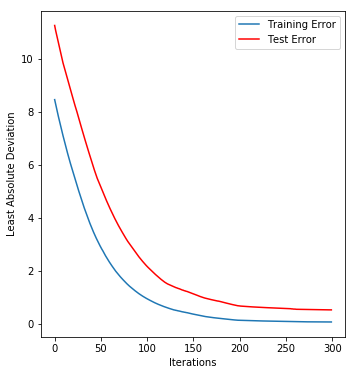

In [11]:
score= np.zeros(300, dtype=np.float64)
train_score = best.train_score_
for i, y_pred in enumerate(best.staged_predict(X_test)):
    score[i] = best.loss_(y_test, y_pred)
    
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(300), train_score, label='Training Error')
plt.plot(np.arange(300), score, 'red', label = 'Test Error')
plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Least Absolute Deviation')

Based upon this, we are not getting much benefit out of additional iterations after about 200.  As a result, this model is probably not the optimal one to use. Let's take a look at what happens with some other models.  

LinearModel Score: 0.9906789850130757
RidgeModel Score: 0.9894596165324064
LassoModel Score: 0.989338332325738
ElasticNetModel Score: 0.9893343438537892
BayesRidgeModel Score: 0.9894275301098987
OMPModel Score: 0.9704056113395044


/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.85505e-18): result may not be accurate.
  overwrite_a=True).T
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0, 0.5, 'Median Absolute Error')

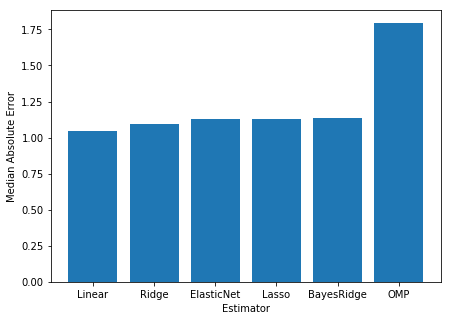

In [12]:
estimators = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]

estimator_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

for i,e in enumerate(estimators):
    e.fit(X_train, y_train)
    print(estimator_labels[i] + 'Model Score: '+str(e.score(X_test,y_test)))
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, estimator_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')

Alright, so our linear model has the best score and the best median absolute error.  Simple is always a good starting place, right?  Let's go with it and see how it works.

In [13]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model = linear_model.LinearRegression()
mae_scorer = make_scorer(median_absolute_error)
clf = GridSearchCV(model, cv=3, param_grid=parameters, scoring=mae_scorer)

pred = clf.fit(X_train,y_train)
best = clf.best_estimator_
print('Linear Model Mean Absolute Error : '+str(median_absolute_error(y_test, clf.predict(X_test))))

Linear Model Mean Absolute Error : 0.9555277108855478


/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


So, our linear model is doing reasonably well with the data we have.  Let's take a look and see what factors may not impact the model, so we can simplify and, ideally, drop some terms.

unemployment_rate_percent Dropped Model Score: 0.9905705871676262
gross_domestic_product Dropped Model Score: 0.9878318482996493
per_capita_personal_income Dropped Model Score: 0.9891908561392543
percent_below_pl Dropped Model Score: 0.9889821587770303
dt Dropped Model Score: 0.9856085631025456


Text(0, 0.5, 'Median Absolute Error')

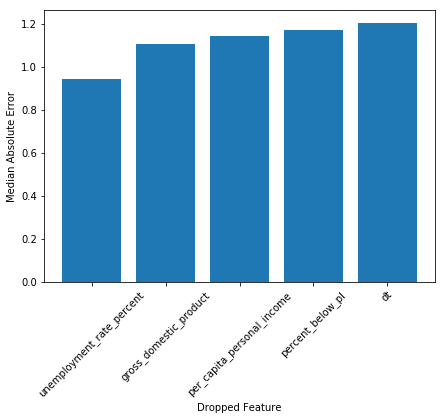

In [23]:
features_to_drop = ['unemployment_rate_percent','gross_domestic_product','per_capita_personal_income','percent_below_pl','dt']
errvals = np.array([])
model1 = linear_model.LinearRegression()
for i,e in enumerate(features_to_drop):
    X_train,X_test,y_train,y_test = train_test_split(master_data.drop(['house_price_index','date',e], axis=1), master_data.house_price_index, test_size=0.2, random_state=20)
    model1.fit(X_train, y_train)
    print(features_to_drop[i] + ' Dropped Model Score: '+str(model1.score(X_test,y_test)))
    this_err = metrics.median_absolute_error(y_test, model1.predict(X_test))
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, features_to_drop, rotation=45)
plt.xlabel('Dropped Feature')
plt.ylabel('Median Absolute Error')

The result of this check shows that, while dropping features does not alter the model performance, the strongest impact appears to be from the unemployment rate, followed by the gross domestic product.  As a result, we probably would recommend that these four features remain components of the model for now.  The addition of other metrics may or may not alter the outcome, but for now, it seems that we have a reasonable first model that does a decent job in replicating the housing price index for Montgomery county.  Just to make sure we have the  final model made, we will rerun the linear model with all features and look at the regression results. 

In [39]:
X_train,X_test,y_train,y_test = train_test_split(master_data.drop(['house_price_index','date'], axis=1), master_data.house_price_index, test_size=0.2, random_state=20)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print('y= '+str(model.intercept_)+' + {} * unemployment_rate + {} * gross_domestic_product +\n {} * per_capita_income + {} * percent_below_povertyline + {} * dt (utc time stamp)'.format(model.coef_[0],model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4]))
print('Score: '+str(model.score(X_test,y_test)))
print('Median Absolute Error: '+str(metrics.median_absolute_error(y_test, model.predict(X_test))))

y= -52.24955674872513 + 0.7627121843414646 * unemployment_rate + 0.7627121843414646 * gross_domestic_product +
 1.4996707015545441e-06 * per_capita_income + -0.001010927248618522 * percent_below_povertyline + 11.440074067171585 * dt (utc time stamp)
Score: 0.9906789850130757
Median Absolute Error: 1.0453041705168005


In [40]:
def fit_model(ur, gdp, pci, ppl, dt):
    return model.intercept_+model.coef_[0]*ur+model.coef_[1]*gdp+model.coef_[2]*pci+model.coef_[3]*ppl+model.coef_[4]*dt

Text(0, 0.5, 'House Price Index \n (2000 = 100)')

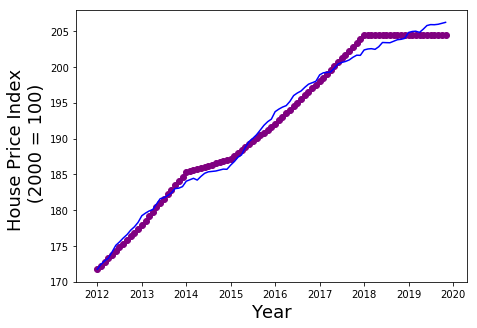

In [50]:

plt.figure(figsize=(7,5))
plt.scatter(master_data['date'],master_data['house_price_index'], color='purple')
plt.plot(master_data['date'], fit_model(master_data['unemployment_rate_percent'],master_data['gross_domestic_product'],master_data['per_capita_personal_income'],master_data['percent_below_pl'],master_data['dt']) + 0., color='blue')
plt.xlabel('Year', fontsize=18)
plt.ylabel('House Price Index \n (2000 = 100)',fontsize=18)

This last plot shows our model in blue against the 

### Summary

In conclusion, we have developed a first stage model for predicting the housing price index for Montgomery County, MD.  Several regression models were evaluated for use, with the final model being a Linear model composed of four independent features: Unemployment Rate, Gross Domestic Product, Per Capita Personal Income, and Percent below the Poverty Line.  While these features may seem linked (e.g. Per Capita Personal Income is likely correlated with the Percent below the Poverty Line), the fact that they may be influenced by each other does not mean that they are covariant at a level we would need to consider dropping one over the other.  

Over the range from 2012 - 2019, Montgomery County government would be best served by attempting to decrease the unemployment rate and boost the gross domestic product, if their aim is to increase the housing price index for the county.  In the future, new metrics could be added to the mix, or the model could be targeted more at specific neighborhoods.  Some examples of the former include crime rate, education levels, school quality, and traffic levels.  For the latter, features relevant to the specific neighborhood would be necessary, which may not be directly available for all of the features employed here.

### Citations
- U.S. Census Bureau, SNAP Benefits Recipients in Montgomery County, MD [CBR24031MDA647NCEN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CBR24031MDA647NCEN, January 6, 2020.
- U.S. Census Bureau, Percent of Population Below the Poverty Level in Montgomery County, MD [S1701ACS024031], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/S1701ACS024031, January 6, 2020.
- U.S. Bureau of Economic Analysis, Per Capita Personal Income in Montgomery County, MD [PCPI24031], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCPI24031, January 6, 2020.
- U.S. Bureau of Economic Analysis, Gross Domestic Product: All Industries in Montgomery County, MD [GDPALL24031], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPALL24031, January 6, 2020.
- U.S. Bureau of Economic Analysis, Gross Domestic Product: All Industries in Montgomery County, MD [GDPALL24031], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPALL24031, January 6, 2020.
- U.S. Federal Housing Finance Agency, All-Transactions House Price Index for Montgomery County, MD [ATNHPIUS24031A], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ATNHPIUS24031A, January 6, 2020.
